In [1]:
from itertools import count, islice

def sampling_sequence(start=1):
    '''
    This is actually called the binary van der Corput sequence. It's
    useful for sampling functions.

    >>> import itertools
    >>> list(itertools.islice(sampling_sequence(), 7))
    [0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875]
    '''
    rev_bin_seq = (''.join(reversed(bin(x)[2:])) for x in count(start))
    return (float(int(x,2)) / (2**len(x)) for x in rev_bin_seq)

In [2]:
[x for x in islice(sampling_sequence(), 7)]

[0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875]

In [3]:
from fractions import Fraction

In [4]:
[Fraction.from_float(x) for x in islice(sampling_sequence(), 8)]

[Fraction(1, 2),
 Fraction(1, 4),
 Fraction(3, 4),
 Fraction(1, 8),
 Fraction(5, 8),
 Fraction(3, 8),
 Fraction(7, 8),
 Fraction(1, 16)]

Validate that we can use this as an effective counterbalancer.

In [10]:
from itertools import permutations
all_condition_sequences = [','.join(x) for x in permutations('norecs general specific'.split())]
all_condition_sequences

['norecs,general,specific',
 'norecs,specific,general',
 'general,norecs,specific',
 'general,specific,norecs',
 'specific,norecs,general',
 'specific,general,norecs']

In [18]:
def get_condition_seq(x):
    return all_condition_sequences[int(x * len(all_condition_sequences))]
get_condition_seq(.5)

'general,specific,norecs'

In [19]:
from collections import Counter

In [32]:
Counter(get_condition_seq(x) for x in islice(sampling_sequence(start=1), 1000))

Counter({'general,specific,norecs': 168,
         'norecs,specific,general': 167,
         'specific,norecs,general': 167,
         'norecs,general,specific': 168,
         'general,norecs,specific': 165,
         'specific,general,norecs': 165})

Hm, it overcounts...

In [38]:
def discrep(ctr):
    return max(ctr.values()) - min(ctr.values())
discreps = [discrep(
    Counter(get_condition_seq(x) for x in islice(sampling_sequence(start=1), n)))
    for n in range(6,1000)]

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

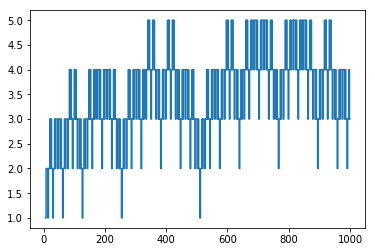

In [44]:
plt.step(np.arange(6, len(discreps)+6), discreps)

In [ ]:
np.random.random()

In [46]:
rand_discreps = [
    discrep(Counter(get_condition_seq(x) for x in np.random.random_sample(n)))
    for n in range(6, 1000)
]

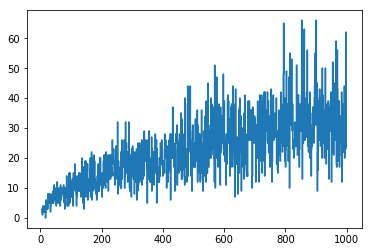

In [47]:
plt.step(np.arange(6, len(rand_discreps)+6), rand_discreps)

So it's better than random assignment, which can reach arbitrarily high discrepencies between highest and lowest values. But it's not as good as a round-robin assignment.

In [48]:
17 % 6

5

In [49]:
roundrobin_d = [
    discrep(Counter(all_condition_sequences[x % 6] for x in range(n)))
    for n in range(6, 1000)
]

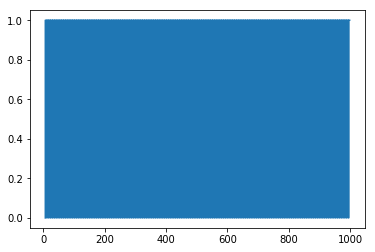

In [50]:
plt.step(np.arange(6, len(roundrobin_d)+6), roundrobin_d)

Duh.